In [1]:
from segment_anything import build_sam_vit_b, SamPredictor
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
model_path = r"D:\Coursework\ACV\sam_pretrained\sam_vit_b_01ec64.pth"

In [3]:
sam = build_sam_vit_b(model_path)
device = "cuda"
sam.to(device=device)


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


In [4]:
predictor = SamPredictor(sam)

In [5]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [6]:
img_path = r"D:\Coursework\ACV\multimodal_dataset\multimodal_dataset\polL_color\outscene1208_2_0000000150.png"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [7]:
image.shape

(1024, 1224, 3)

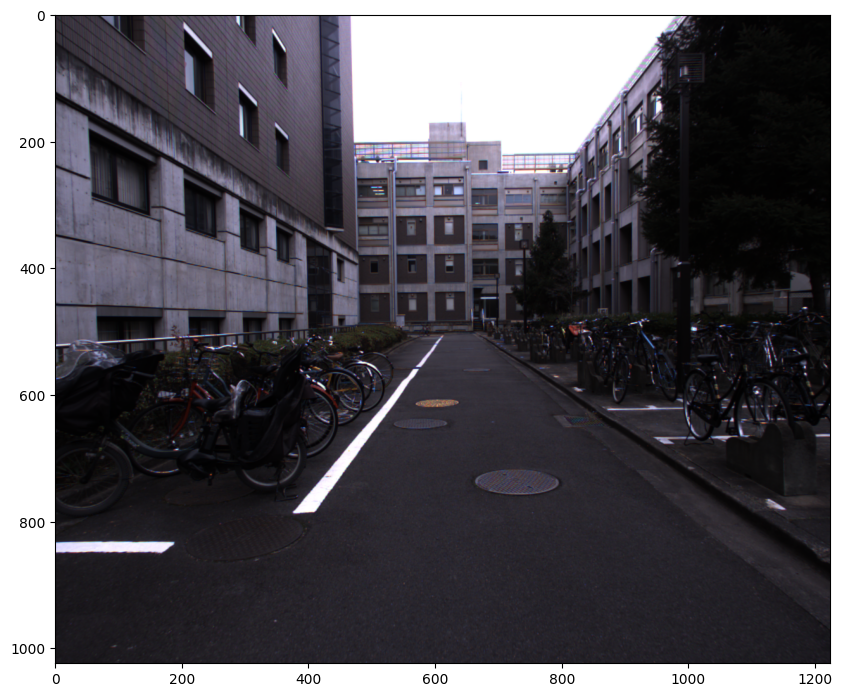

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [14]:
predictor.set_image(image)

In [25]:
input_point = np.array([[725, 735]])
input_label = np.array([1])

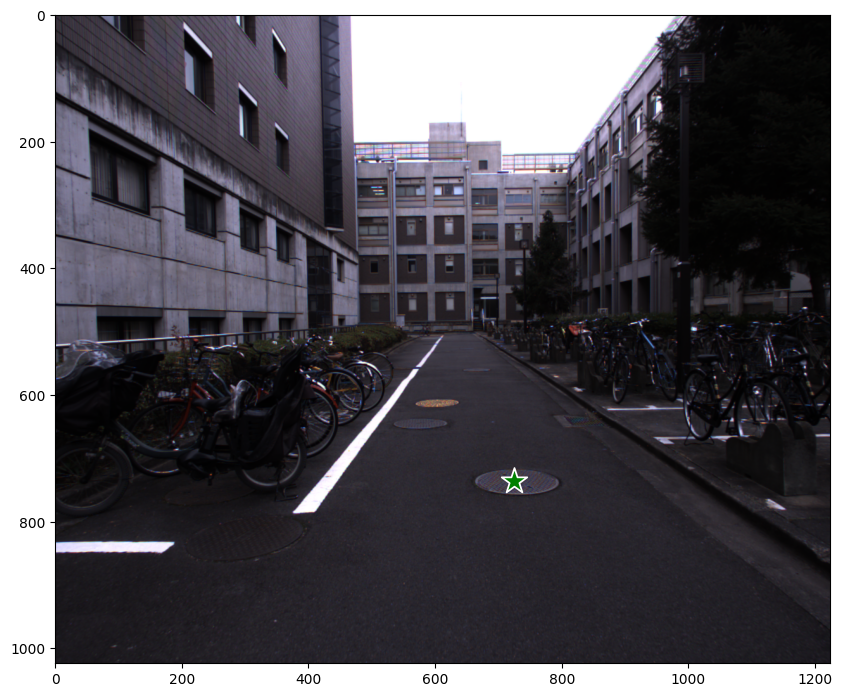

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show() 

In [27]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [ ]:
masks[0]

(1024, 1224)

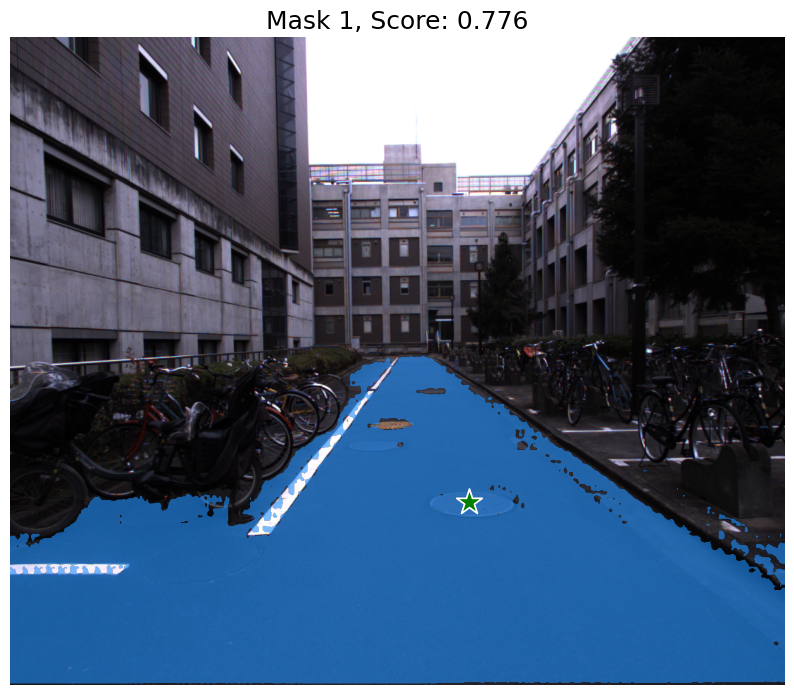

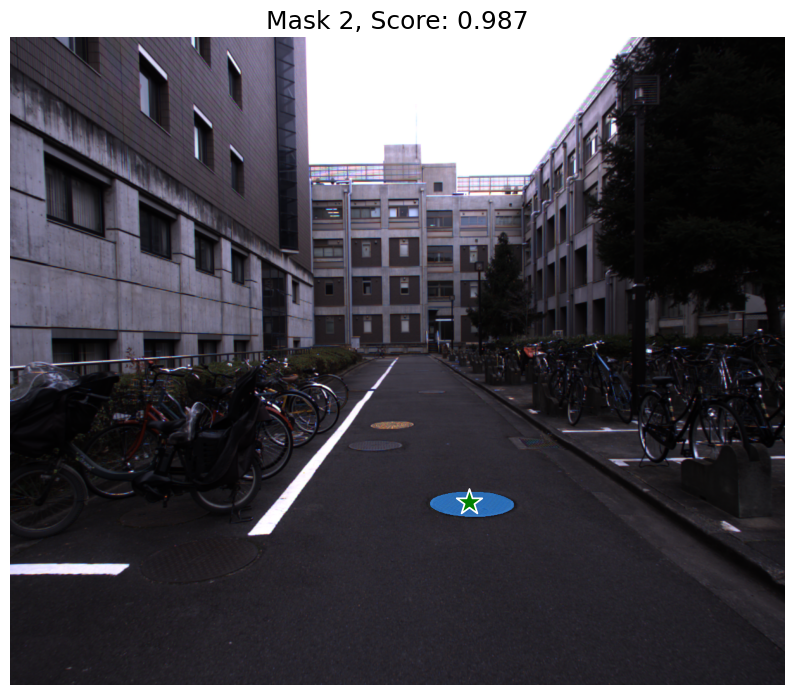

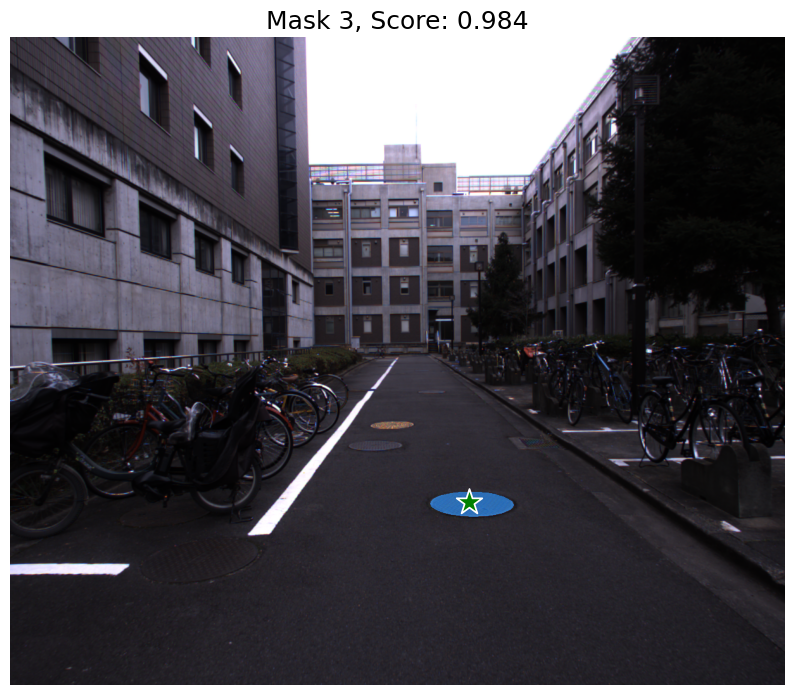

In [35]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

In [8]:
aolp_cos = r"D:\Coursework\ACV\multimodal_dataset\multimodal_dataset\polL_dolp\outscene1208_2_0000000150.npy"

In [9]:
a = np.load(aolp_cos)

In [23]:
a.shape

(1024, 1224)

In [11]:
nirwarped = r"D:\Coursework\ACV\multimodal_dataset\multimodal_dataset\NIR_warped\outscene1208_2_0000000150.png"
nir = cv2.imread(nirwarped)
print(nir.shape)

(1024, 1224, 3)


In [12]:
aolp_cos_path = r"D:\Coursework\ACV\multimodal_dataset\multimodal_dataset\polL_aolp_cos\outscene1208_2_0000000150.npy"
aolp = np.load(aolp_cos_path)
print(aolp.shape)

(1024, 1224)


In [13]:
aolp

array([[0.40080017, 0.43119726, 0.44605866, ..., 0.9569953 , 0.84611744,
        1.0986923 ],
       [0.40312466, 0.413242  , 0.42719987, ..., 0.9200018 , 1.0588734 ,
        0.8568829 ],
       [0.33082506, 0.45078507, 0.41852397, ..., 0.8015516 , 1.082016  ,
        0.62246335],
       ...,
       [0.99803907, 1.0027535 , 0.9201699 , ..., 0.9274775 , 0.96174955,
        0.99638915],
       [1.001076  , 1.0147834 , 0.46482205, ..., 0.97855896, 0.8928322 ,
        0.98532605],
       [0.99134374, 0.97320485, 0.9076798 , ..., 0.97952336, 0.97415423,
        0.9560728 ]], dtype=float32)

In [11]:
mask_path = r"D:\Coursework\ACV\multimodal_dataset\multimodal_dataset\SS\outscene1208_2_0000000150.png"
mask_img = cv2.imread(mask_path)

In [15]:
mask_img[:,:,0]

array([[14, 14, 14, ..., 24, 24, 24],
       [14, 14, 14, ..., 24, 24, 24],
       [14, 14, 14, ..., 24, 24, 24],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [16]:
mask_img[:,:,1]

array([[14, 14, 14, ..., 24, 24, 24],
       [14, 14, 14, ..., 24, 24, 24],
       [14, 14, 14, ..., 24, 24, 24],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [17]:
mask_img[:,:,2]

array([[14, 14, 14, ..., 24, 24, 24],
       [14, 14, 14, ..., 24, 24, 24],
       [14, 14, 14, ..., 24, 24, 24],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [20]:
np.unique(mask_img)

array([ 0,  1, 10, 11, 14, 16, 20, 24, 25, 26, 27], dtype=uint8)

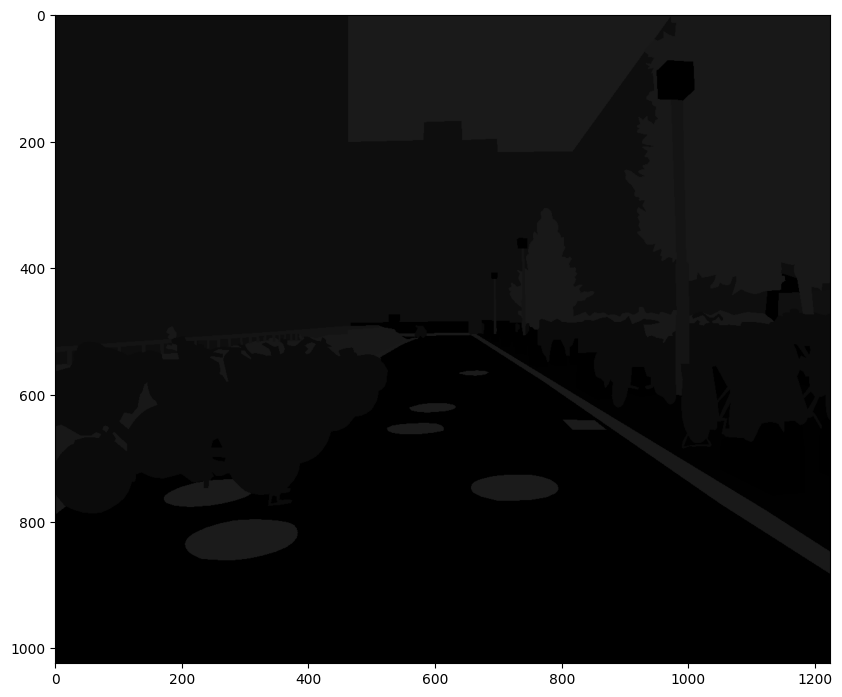

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(mask_img)
plt.axis('on')
plt.show() 

In [26]:
import torch.nn as nn

ip = torch.rand(3, 128,128)

In [ ]:
conv = nn.Conv2d(3, 10, kernel_size=(16, 16), stride=(16, 16), padding=(0, 0))


In [30]:
op = conv(ip)
op.shape

torch.Size([10, 8, 8])

In [28]:
w = conv.weight

In [36]:
w

Parameter containing:
tensor([[[[-2.7513e-02,  3.4962e-02,  2.5757e-02,  ..., -3.5038e-03,
           -2.4854e-03, -2.1068e-02],
          [ 7.0295e-03,  3.6912e-03,  1.8950e-02,  ...,  2.0499e-02,
           -9.0051e-03, -1.1512e-02],
          [ 8.5243e-03,  8.1808e-03, -1.8106e-02,  ..., -3.5500e-02,
            2.4733e-03,  2.0058e-02],
          ...,
          [ 3.3830e-02,  2.5860e-02,  1.6655e-02,  ..., -2.8320e-02,
            2.4823e-02,  2.2328e-02],
          [-3.5451e-02, -2.9778e-02, -1.0025e-02,  ..., -6.8957e-03,
            3.1207e-02,  2.2811e-02],
          [-1.5394e-02, -1.6064e-02,  1.4310e-02,  ...,  2.7437e-02,
           -1.3299e-02,  1.0658e-02]],

         [[ 2.1725e-02,  1.0379e-02,  4.4336e-03,  ..., -1.1018e-02,
            9.6510e-03, -1.0439e-02],
          [ 1.5935e-02, -2.4673e-02, -4.1712e-03,  ..., -1.9271e-02,
           -8.9551e-03,  1.8890e-02],
          [ 3.0165e-02,  1.6280e-02,  2.7236e-02,  ..., -3.2321e-02,
           -1.0454e-02,  3.3844e-02]

In [37]:
a = w.repeat(1,2,1,1)
a = nn.Parameter(a)

In [38]:
conv.weight = a

In [40]:
ip2 = torch.rand(6, 128,128)

In [42]:
op = conv(ip2)

In [43]:
op.shape

torch.Size([10, 8, 8])